# Mock objects

Sometimes just ***patching return value of a function call with a return code or a string*** isn't enough. 

**What if the return value of the function you want to patch is actually an object with multiple values and methods?**

You could replace the entire object with another object: **a mock object**.

A **mock object** is `an object that simulates or mimics the behavior of a real object in ways that you can control`. 
* You can control how the mock object behaves and whatever it returns. 
* You can set multiple attributes on it and make it behave just like the real object that it's replacing. 

The two Mock objects that come with Python’s `unittest` package are `Mock` and `MagicMock`. 
* The only difference between them is that `MagicMock` implements all of the **magic functions** in Python. 
* Those are the **functions whose names are surrounded by double underscores**. 
* With **magic functions**, you can use mock objects in place of containers or other objects that implement the Python protocols. 
* If you don't need those magic functions, the `Mock` class will fit your needs perfectly.

# How do Mock Objects work?

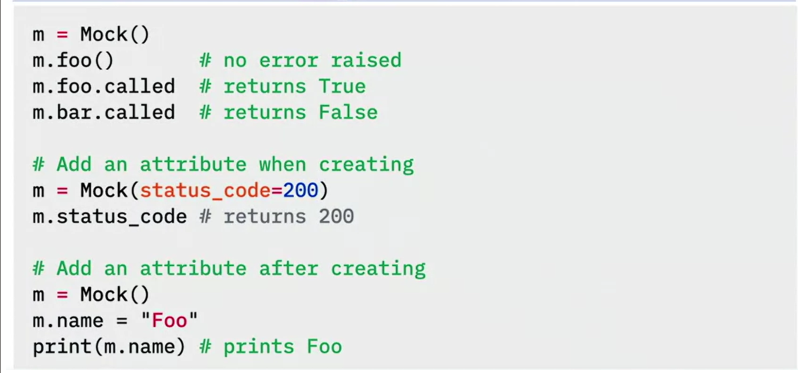

Let's look at how the `Mock` class works.

We can create an instance of the `Mock` class just like any other class.
* If we call a method on it, like `foo()`, it happily **returns a mocked method with no error**.
* Any method that you call on a **mock object will work without error**.

We can **pass a mock object into a function** and then later interrogate it to see if that function called its method correctly.
* In this example, if we check if the `foo()` method was called and it was, so it will return `True`.
* If we didn't call the `bar()` method and we check if it was called, it will return `False`.

We can **add attributes to the mock object** while creating it.
* These can be any attributes we need for our test case.
* In this example, we create a **mock object** and give it an attribute of `status_code`, and **set status_code to 200**.
* If we then check the `status_code`, we’ll get back the `200` that we set when we created it.

We can also **set attributes after the object is created** just like we can with real objects.
* In this example, we’re setting the name attribute to "`Foo`" 
* Even though the mock object doesn't have an attribute called "`name`" it creates one on-the-fly without any error and accepts the assigned value.
* When we print the name attribute we get "`Foo`" back just as expected with a real object.


# Mocking a specific class

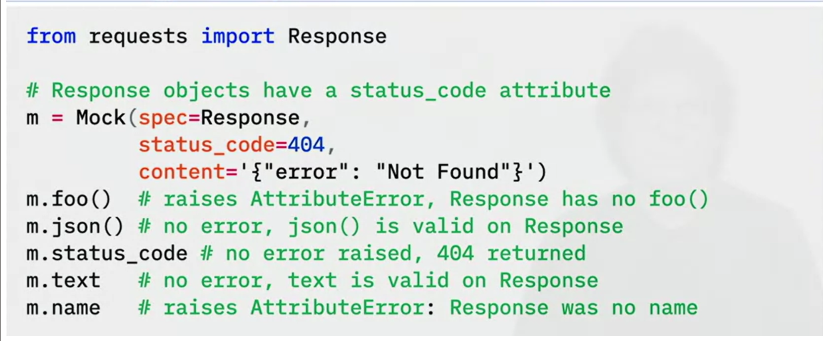

You can also have **a mock mimic a specific class instead of creating attributes and method calls on the fly**.
* In this example, we’re **importing `Response` from the `requests` package**.
* This is the class we’ll mock.

Then, we create a `Mock` using the "`spec`" parameter to indicate that we want this mock to behave like a `Response` class.

We also set a `status_code` of `404` and a `content` attribute with an error message in it.

Now, when we call `m.foo()` we receive an `AttributeError` because the `Response` class doesn't have a method called `foo()`.
* Remember that `foo()` worked before we used the `spec` parameter.
* Now we have a mock class that is behaving like a `Response` class.

Next, we'll call `m.json()`. The `Mock` class dynamically creates a `json()` method and **returns it with no error** because the `Response` class actually has a method called `json()`.

When we call `m.status_code` we get back the `404` code just like the real object would have.

If we call `m.text` we get **no error** because the real `Response` class has an attribute called `text`.

However, if we call `m.name` it raises an `AttributeError` because the real `Response` class does not have an attribute called `name`.

Again, **mock objects can behave exactly the way we expect a real object**, in this case, the `Response` object.


# Patch example using MagicMock

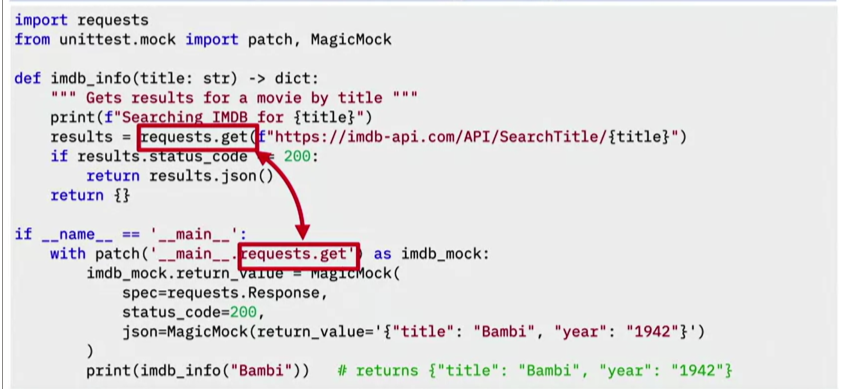

Now let's put it all together by using a **patch** and a **mock object**.

We’ll use the same patch technique as before to address a more complicated mock.
* We start by importing the `requests` package.
* This is the package where we’ll patch the `get()` function.
* Then, from `unittest.mock` we **import `patch` and `MagicMock`**.
* We’ll use the `patch` function and the `MagicMock` class in our tests.

Now, we’ll rewrite the `imdb_info()` method to make it more robust.
* It still accepts the `title` as a string and returns a dictionary.
* We give it a good **docstring** so programmers know what it does.
* Then, we print out the name of the movie we're looking for.
* If this were production code, we would use **logging** instead of print statements, but you get the idea.

Now, we make a call to the IMDB database.
* This is the `requests.get()` call that we are going to **patch** later.
* Remember I said we've made this implementation a little more robust.
* This time we **check that the return code is good** before we try and get the results.
* This line of code is one reason that we can't just substitute a return value like in the previous example.
* We **need to return something that behaves like the real results** that come back from a `requests.get()` method.
* If the return code is `200`, we then call the `results.json()` function to return the result in **JavaScript Object Notation** or **JSON**.
* Hopefully, you can see that mocking this will involve a lot more than just a single return value as in the previous example.
* If the **return code is not `200`**, we **return an empty dictionary**.

Now we're ready to write the main part of our test.
* We use a "`with`" statement to **patch** the `requests.get()` function in our **main** program.
* We create a variable called "`imdb_mock`" that represents the **patched function**.
* This next line of code sets the `return_value` of the `imdb_mock` to a `MagicMock`.
* This means that when `requests.get()` is called in our `imdb_info()` function, the `MagicMock` object is going to be returned instead.
* Next, we use the spec parameter to tell `MagicMock` that it should implement the **`requests.Response` specification**.
* We know that `requests.get()` returns a `Response` object so when this `MagicMock` gets returned, we want it to behave like the `Response` object that our code expects.
* Next, we set the `status_code` to `200` because we know the new `imdb_info()` function expects this return code.
* In later tests, we could set this to other values **to simulate error conditions**.
* We know that the `imdb_info()` function is going to call the `json()` function on the `Response` object that it gets back from the `requests.get()` call.
* So we need to tell `MagicMock` to create a `json()` method and set its `return_value` to the **JSON** that we want returned for our test.
* Note how we are in complete control of what gets returned.
* The last step is to actually call the `imdb_info()` function and pass in a **movie name**.
* When we do, everything works as expected and we get back the movie information that we specified in our mock.

Just to reiterate, when the line to call `requests.get()` is called, **it activates the patch to substitute the mock in its place**.

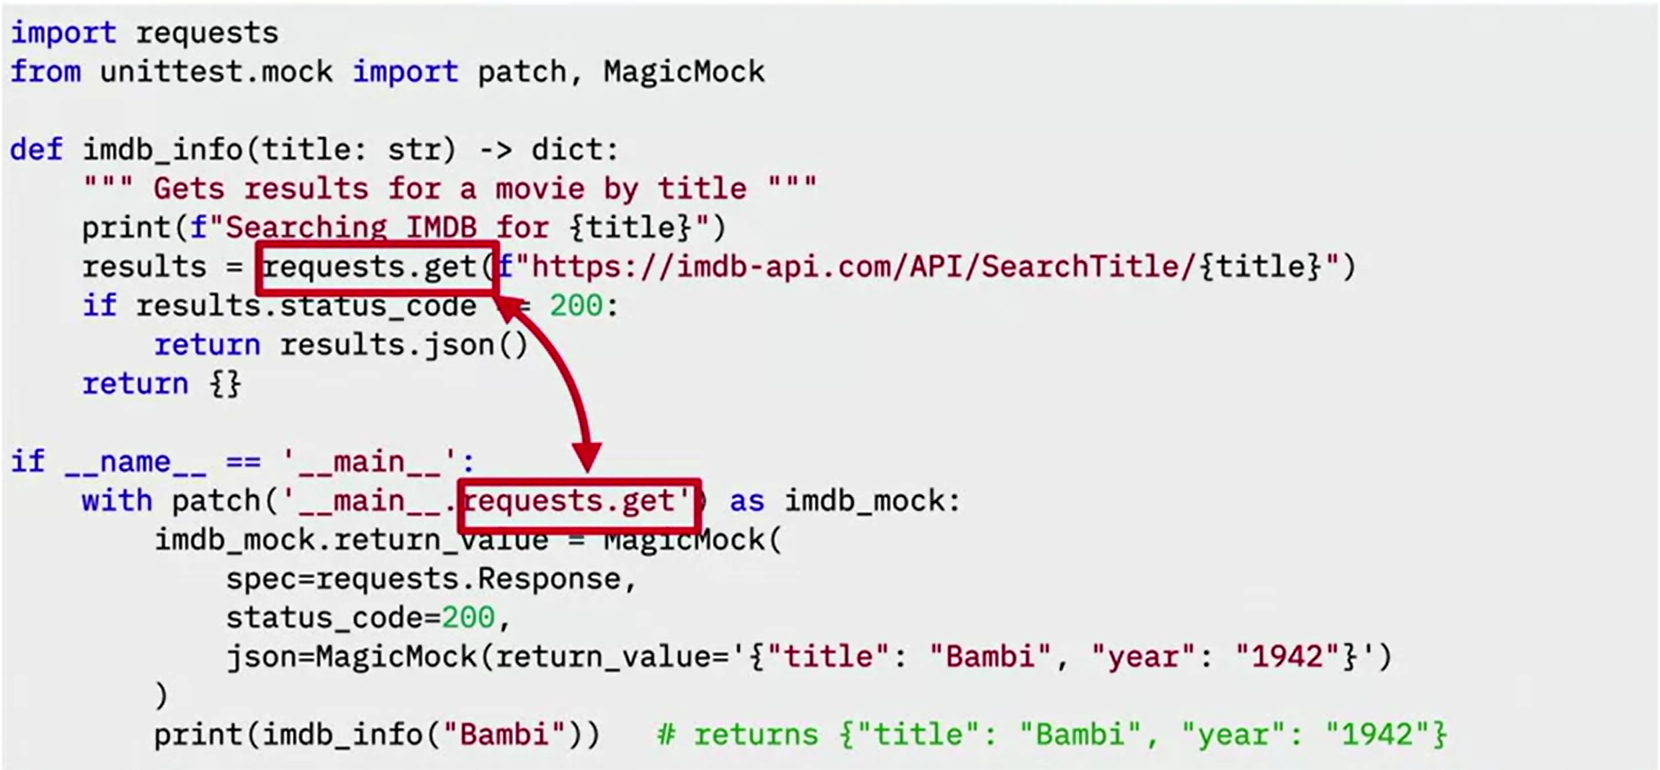

The result returned is actually the `MagicMock` that we had spec to behave like a real `Response` object.

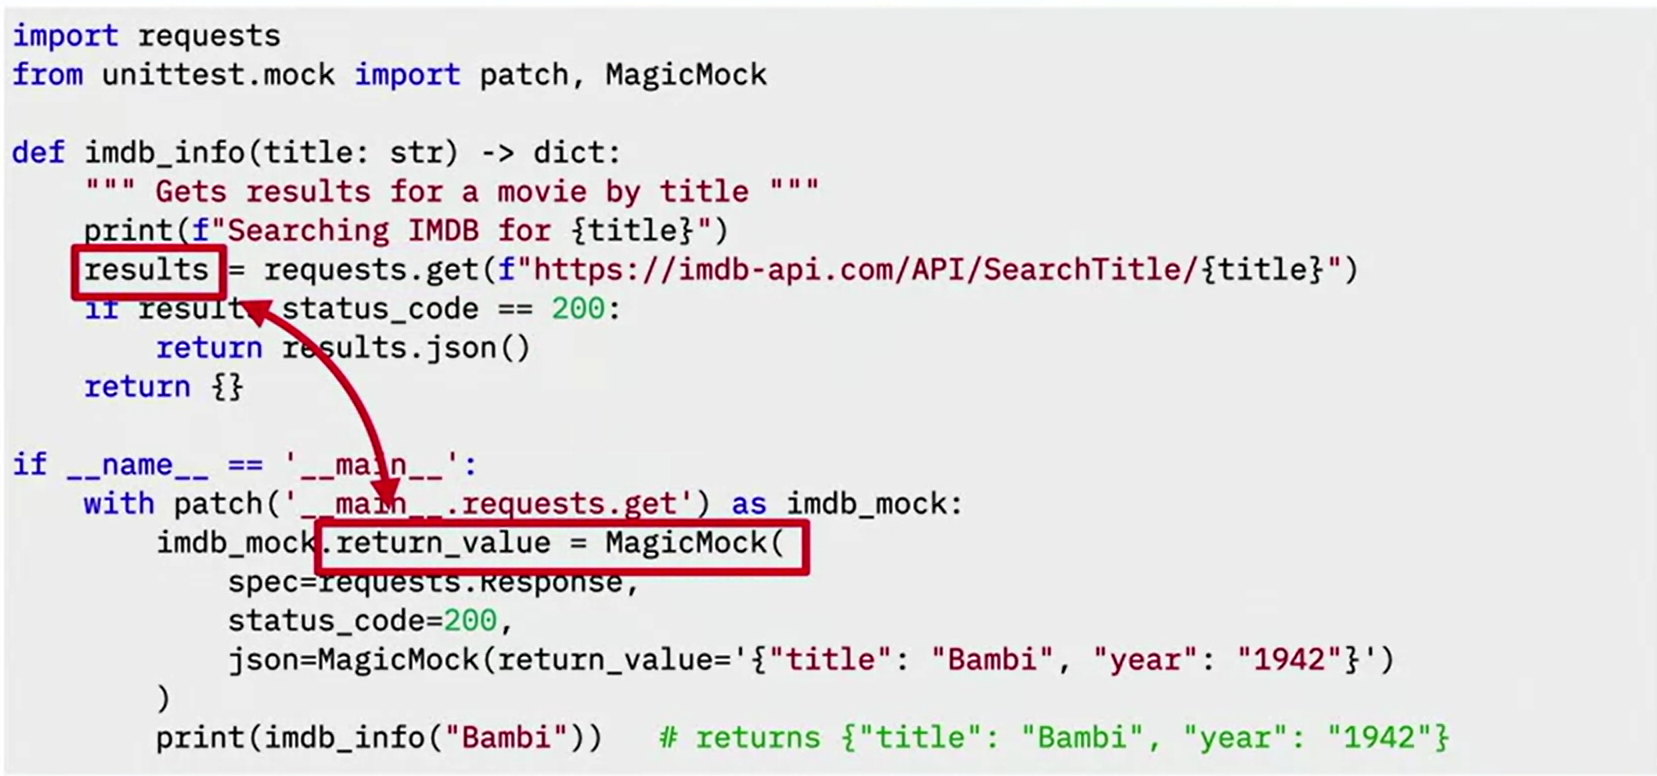

When the **status code** is checked, it will return `200` just as we specified.

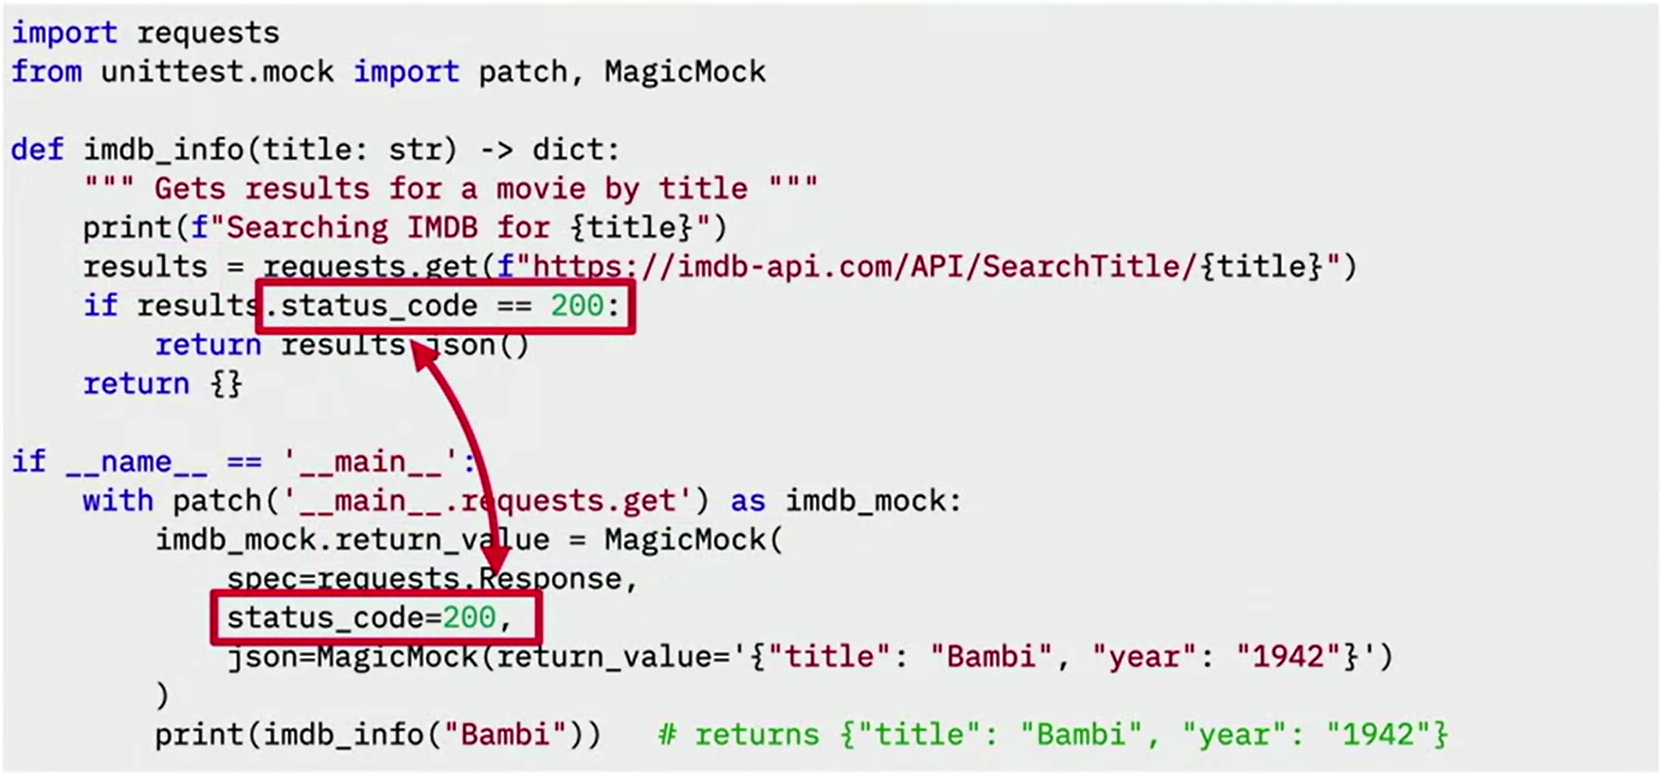

Finally, when the `json()` method is called to get the **payload**, it will return the exact data that we specified.

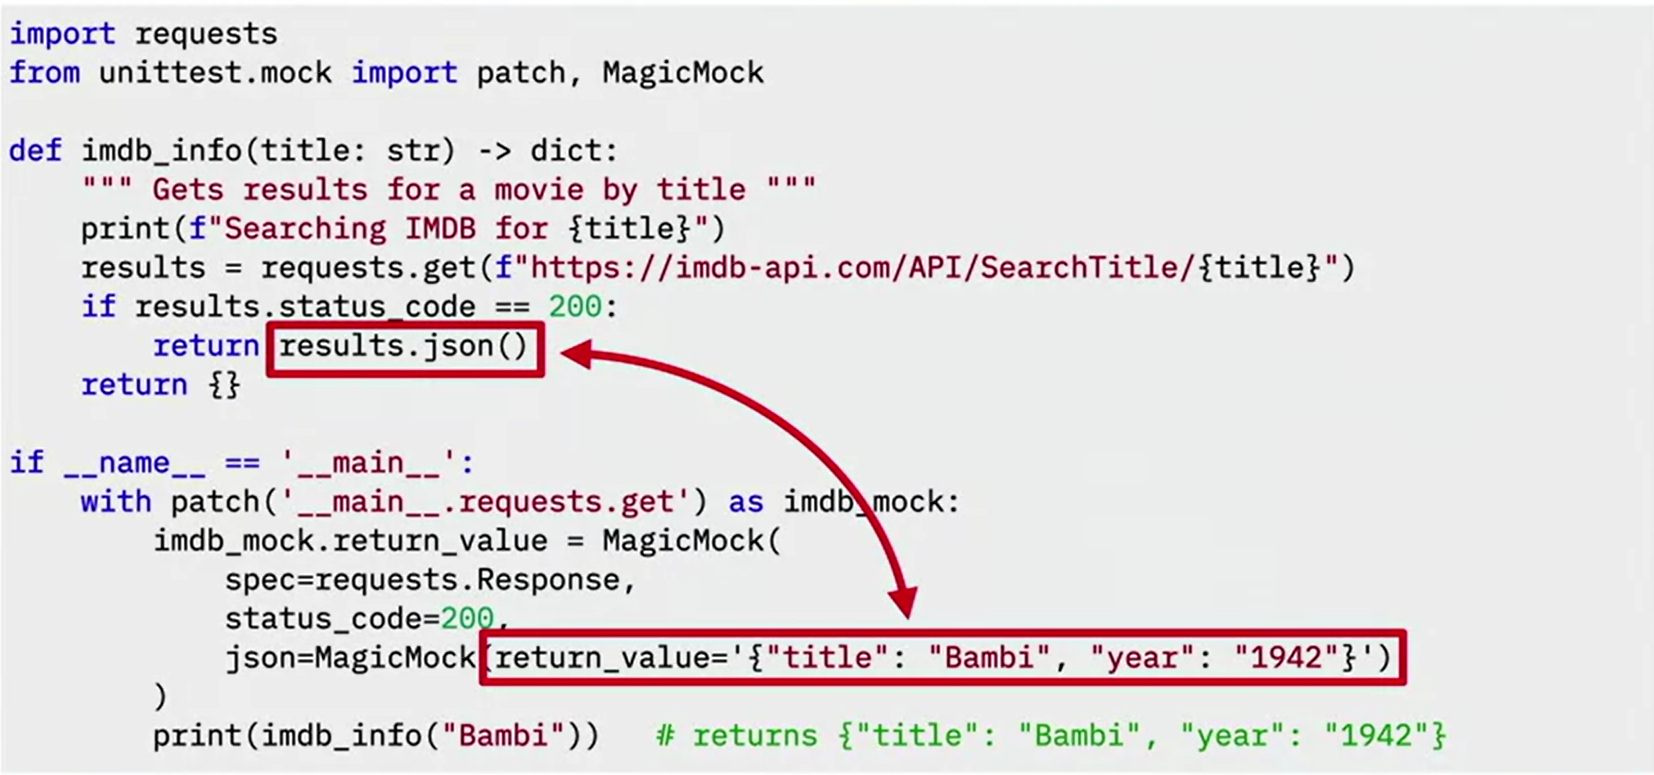

Hopefully, this shows you how powerful using **mock objects** like `Mock` and `MagicMock` can be, especially **as return values from patched function calls**.

# Returning mock objects

* With **mock objects**, you get **complete control to mimic any behavior** that your test case needs.
* You can **control any return code** that you need so that you can **simulate `good return codes` as well as `bad return codes`**.
* You can **even control what function calls return like the `json()` function** in our example.
* We **use mocks to create conditions under tests that may be impossible under normal circumstances**.
* But, you should **use mocks sparingly because you want to be sure that you are testing your code** and **not your mock**s.